# Mohammed Al Mujadib

## Project: Write A Data Science Blog Post (Stack Overflow Data - 2017 Survey)

## Using CRISP-DM process:

**I will explore Stack Overflow Data - 2017 Survey to find out the follwing questions:**

### 1. Business Understanding:

**I will explore Stack Overflow Data - 2017 Survey to find out the follwing questions:**

**Q1:What is the highest salary for a developer and the average salary?**


**Q2:Are the developer satisfied about their careers and what is the average of this satisfaction?**


**Q3:Which location has the highest average salary?**


### 2. Data Understanding:
**Discover dataset to understand useful coulmns, rows and how to handle them.**

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#showing all columns
pd.set_option('display.max_columns', None)

**Loading Dataset:**

In [223]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

**Demonstrate Schema:**

In [224]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [226]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [227]:
df.shape

(51392, 154)

In [228]:
df.sample(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
42475,42476,Professional non-developer who sometimes write...,"Yes, I program as a hobby",Zambia,"Yes, part-time",Employed full-time,Bachelor's degree,NaN,"More than half, but not all, the time",20 to 99 employees,I don't know,3 to 4 years,1 to 2 years,NaN,NaN,NaN,NaN,C-suite executive; Designer or illustrator; El...,10.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some other way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I'm not actively looking, but I am open to new...",0.0,Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scrum,Git,Multiple times a day,Strongly agree,Strongly agree,Strongly disagree,Somewhat agree,Strongly agree,Agree,Somewhat agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44454,44455,Professional developer,No,United States,No,Employed full-time,Some college/university study without earning ...,I never declared a major,A few days each month,20 to 99 employees,Venture-funded startup,14 to 15 years,1 to 2 years,NaN,Web developer,Back-end Web developer,NaN,NaN,10.0,6.0,NaN,NaN,NaN,NaN,

### 3. Prepare Data:

**Checking if there any record duplicate:**

**Test:**

In [229]:
sum(df.duplicated())

0

**Checking of the number of missing values in Salary column:**

**Code:**

In [230]:
df['Salary'].notnull().value_counts()

False    38501
True     12891
Name: Salary, dtype: int64

**Dropping all rows with null values in Salary column to be more accurate:**

In [231]:
df_salary = df.dropna(subset =['Salary'], axis=0)

**Test:**

In [232]:
df_salary['Salary'].notnull().value_counts()

True    12891
Name: Salary, dtype: int64

**Checking of the number of missing values in CareerSatisfaction column:**

**Code:**

In [233]:
df['CareerSatisfaction'].notnull().value_counts()

True     42695
False     8697
Name: CareerSatisfaction, dtype: int64

**Dropping all rows with null values to be more accurate:**

In [234]:
df_career = df.dropna(subset =['CareerSatisfaction'], axis=0)

**Test:**

In [235]:
df_career['CareerSatisfaction'].notnull()

2        True
3        True
4        True
6        True
7        True
         ... 
51386    True
51387    True
51389    True
51390    True
51391    True
Name: CareerSatisfaction, Length: 42695, dtype: bool

**Checking of the number of missing values in Country column:**

**Code:**

In [236]:
df['Country'].notnull().value_counts()

True    51392
Name: Country, dtype: int64

**None missing values**

**Code:**

**Choosing columns:**

In [237]:
columns = ['Respondent','Country','Salary']

data = data[columns]

**Test:**

In [238]:
data.head()

,Respondent,Country,Salary
2,3,United Kingdom,113750.0
4,5,Switzerland,NaN
7,8,Poland,NaN
11,12,Canada,NaN
13,14,Germany,NaN


**I will choose and create two continents which are Europe and North America as Variables then Add countries to them. Then, add third catagory to them:**

**Code:**

In [239]:
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']

North_America = ['United States', 'Canada']
    

data['Location'] = data['Country'].apply(lambda x: 'Europe' if x in Europe 
                                         else ('North_America' if x in North_America else 'Other'))

**Test:**

In [240]:
data.head()

,Respondent,Country,Salary,Location
2,3,United Kingdom,113750.0,Europe
4,5,Switzerland,NaN,Europe
7,8,Poland,NaN,Europe
11,12,Canada,NaN,North_America
13,14,Germany,NaN,Europe


**Code:**

**Filter thr rest of countries to others**

In [241]:
data = data[data['Location'].isin(["Europe","North_America"])]

**Test:**

In [242]:
data.Location.unique()

array(['Europe', 'North_America'], dtype=object)

### 4. Model Data:

#### Q1:What is the highest salary for a developer and the average salary?

Average Salary:56298$


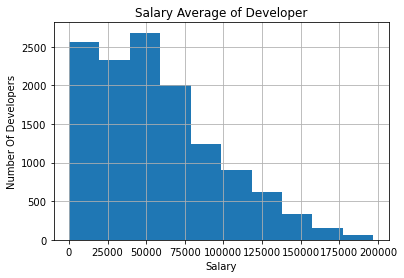

In [243]:
average_salary = round(df_salary['Salary'].mean())
Number_Of_Developers= df_salary['Respondent']
print("Average Salary:"+str(average_salary)+'$')
df['Salary'].hist();
plt.title('Salary Average of Developer');
plt.xlabel('Salary');
plt.ylabel('Number Of Developers');

**the average developers salary is 56298 and most portion of developers salary between 0 and 75000**

In [244]:
max_salary = max(df_salary['Salary'])
print("Highest Salary:\t"+str(max_salary)+"$")

Highest Salary:	197000.0$


#### Q2:Are the developer satisfied about their careers and what is the average of this satisfaction?

Average Career Satisfaction:7.3


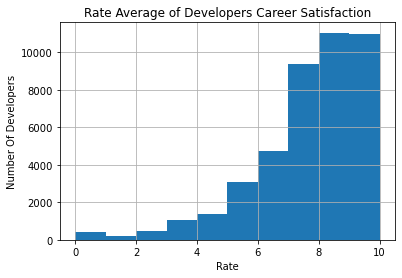

In [245]:
average_career = round(df_career['CareerSatisfaction'].mean(),2)
Number_Of_Developers= df_salary['Respondent']
print("Average Career Satisfaction:"+str(average_career))
df['CareerSatisfaction'].hist();
plt.title('Rate Average of Developers Career Satisfaction');
plt.xlabel('Rate');
plt.ylabel('Number Of Developers');

**The average satisfaction of developers about there career is 7.3 from 10.0**

#### Q2:Which location has the highest average salary?

In [246]:
columns = ['Country','Salary', 'Location']
                                                                    
average_salary = data[columns]

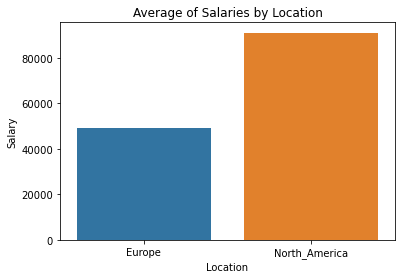

In [247]:
salary_plot = average_salary.groupby(['Location'])['Salary'].mean().reset_index()

sns.barplot(x = 'Location', y = 'Salary', data = salary_plot)
plt.title('Average of Salaries by Location');

**Like we see in the baragraph average salary in north america is Higher than the average salary in europe for developers**

### 5. Results:

**1- The average developers salary is 56298 and most portion of developers salary between 0 and 75000$**

**2- The Highest Salary: 197000$**

**3- The average satisfaction of developers about there career is 7.3 from 10.0**

**4- The average salary in north america is Higher than the average salary in europe for developers almost the double**